(512, 512)

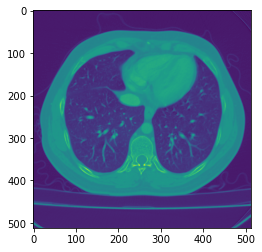

In [8]:
import pydicom as dicom
import matplotlib.pylab as plt
# specify your image path
image_path = 'CHAOS_challenge/TrainingSet_CT/CT/1/DICOM_anon/i0000,0000b.dcm'
ds = dicom.dcmread(image_path)
plt.imshow(ds.pixel_array)
ds.pixel_array.shape



In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [6]:
import imageio

im = imageio.imread('CHAOS_challenge/TrainingSet_CT/CT/1/DICOM_anon/dicom-results/middle-slice/sample-slice000.png')
print(im.shape)

(512, 512, 4)
